In [4]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import files
import re

In [11]:
url= 'https://raw.githubusercontent.com/shakiltonmoy/Python_for_Biologists/refs/heads/main/Line_plot_data.csv'
df = pd.read_csv(url)
df.head()

,Hours,WT 1,WT 2,WT 3,DHNOX 1,DHNOX 2,DHNOX 3
0,0,0.044,0.045,0.050,0.043,0.044,0.045
1,4,0.281,0.246,0.244,0.218,0.233,0.239
2,8,0.569,0.525,0.531,0.620,0.567,0.522
3,12,0.812,0.788,0.748,0.744,0.782,0.730
4,16,1.191,1.071,1.063,1.252,1.086,1.042


In [12]:
display(df.head())

,Hours,WT 1,WT 2,WT 3,DHNOX 1,DHNOX 2,DHNOX 3
0,0,0.044,0.045,0.050,0.043,0.044,0.045
1,4,0.281,0.246,0.244,0.218,0.233,0.239
2,8,0.569,0.525,0.531,0.620,0.567,0.522
3,12,0.812,0.788,0.748,0.744,0.782,0.730
4,16,1.191,1.071,1.063,1.252,1.086,1.042


In [14]:
#Tidy to long format
time_col = df.columns[0]        # 'time_h'
value_cols = df.columns[1:]     # all samples

long_df = df.melt(id_vars=[time_col],
                  value_vars=value_cols,
                  var_name='StrainRep',
                  value_name='OD')

# Remove trailing replicate number to get the base strain name (e.g., "WT 1" -> "WT")
long_df['Strain'] = long_df['StrainRep'].str.replace(r'\s*\d+$', '', regex=True)

# Compute mean ± SEM per time × strain
summary = (long_df
           .groupby([time_col, 'Strain'], as_index=False)
           .agg(mean=('OD', 'mean'),
                sem=('OD', lambda x: x.std(ddof=1)/np.sqrt(len(x)))))

print("Summary (first rows):\n", summary.head(), "\n")


Summary (first rows):
    Hours Strain      mean       sem
0      0  DHNOX  0.044000  0.000577
1      0     WT  0.046333  0.001856
2      4  DHNOX  0.230000  0.006245
3      4     WT  0.257000  0.012014
4      8  DHNOX  0.569667  0.028322 



In [15]:
# Recalculate error bars
summary['sem_lower'] = summary['mean'] - summary['sem']
summary['sem_upper'] = summary['mean'] + summary['sem']
display(summary.head())

,Hours,Strain,mean,sem,sem_lower,sem_upper
0,0,DHNOX,0.044000,0.000577,0.043423,0.044577
1,0,WT,0.046333,0.001856,0.044477,0.048189
2,4,DHNOX,0.230000,0.006245,0.223755,0.236245
3,4,WT,0.257000,0.012014,0.244986,0.269014
4,8,DHNOX,0.569667,0.028322,0.541345,0.597988


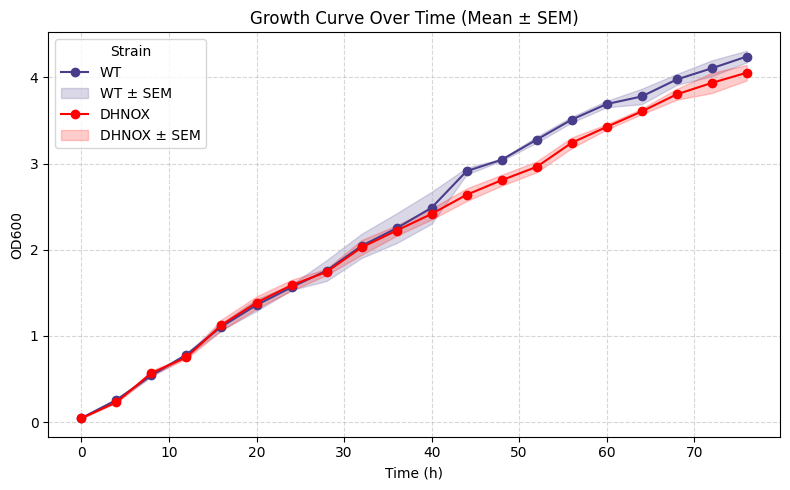

In [24]:
# Generate plot
plt.figure(figsize=(8,5))
ax = plt.gca()

# WT data
wt = summary[summary['Strain'] == 'WT']
plt.plot(wt[time_col], wt['mean'], '-o', color='DarkSlateBlue', label='WT')

# WT SEM shading + label
plt.fill_between(wt[time_col],
                 wt['mean'] - wt['sem'],
                 wt['mean'] + wt['sem'],
                 color='DarkSlateBlue', alpha=0.2,
                 label='WT ± SEM')

# DHNOX data
dh = summary[summary['Strain'] == 'DHNOX']
plt.plot(dh[time_col], dh['mean'], '-o', color='Red', label='DHNOX')

# DHNOX SEM shading + label
plt.fill_between(dh[time_col],
                 dh['mean'] - dh['sem'],
                 dh['mean'] + dh['sem'],
                 color='Red', alpha=0.2,
                 label='DHNOX ± SEM')

plt.xlabel("Time (h)")
plt.ylabel("OD600")
plt.title("Growth Curve Over Time (Mean ± SEM)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Strain")
plt.tight_layout()
plt.show()
